# Module 4: Simulating Simple 1D Systems

Now that we understand the basic physics and algorithms (Newton's laws, potential energy, Verlet integration), let's put them into practice! In this module, we will write Python code to simulate the motion of a single particle in one dimension (1D) under the influence of simple potential energy functions. This will allow us to solidify our understanding of the core MD loop and basic analysis techniques before tackling more complex systems or concepts.

We'll start with the simplest oscillating system: the Simple Harmonic Oscillator.

## Setup: Importing Libraries

First, let's import the necessary Python libraries: `NumPy` for numerical operations and `Matplotlib` for plotting our results.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting style configuration (optional)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (6,4) # Default figure size
plt.rcParams['lines.linewidth'] = 2

## Lesson 1: Particle in a Simple Harmonic Potential (NVE)

The Simple Harmonic Oscillator (SHO) is a fundamental model in physics. It describes a system where the restoring force is directly proportional to the displacement from an equilibrium position. Think of a mass attached to a spring.

**Potential Energy**

For a 1D SHO:

$$
V(x) = \frac{1}{2}kx^2
$$

where $k$ is the spring constant (stiffness) and $x$ is the displacement from equilibrium ($x=0$).

**Force**

The force is the negative derivative of the potential:

$$
F(x) = -\frac{dV}{dx} = -kx
$$

The negative sign means the force is restoring, always pulling the particle back toward $x=0$.

We will simulate this system in the **microcanonical (NVE) ensemble**, where total energy (kinetic + potential) should be conserved up to numerical integration error.


### Defining the Potential and Force Functions
Let's write Python functions for the SHO potential energy and force.

In [ ]:
def potential_sh(x, k):
  """Calculates the potential energy of a simple harmonic oscillator."""
  return 0.5 * k * x**2

def force_sh(x, k):
  """Calculates the force on a particle in a simple harmonic potential."""
  return -k * x

### Implementing the Velocity Verlet Integrator

Now, let's implement the Velocity Verlet algorithm we discussed in Module 2. This function will take the current position, velocity, mass, time step, and the force function as input, and return the updated position and velocity. This integrator is suitable for NVE simulations.

In [ ]:
def velocity_verlet_step(x_curr, v_curr, mass, dt, force_func, **force_args):
    """
    Performs one step of the Velocity Verlet algorithm in 1D (for NVE)
    using half-step velocity updates.

    Args:
        x_curr (float): Current position.
        v_curr (float): Current velocity.
        mass (float): Mass of the particle.
        dt (float): Time step.
        force_func (callable): Function to calculate force; it should accept
                               position `x` as the first argument, followed
                               by any potential parameters (e.g., k).
        **force_args: Additional keyword arguments for the force function.

    Returns:
        tuple: (x_new, v_new) - Updated position and velocity.
    """
    # 1. Compute force & acceleration at current position
    f_curr = force_func(x_curr, **force_args)
    a_curr = f_curr / mass

    # 2. Half-step velocity update
    v_half = v_curr + 0.5 * a_curr * dt

    # 3. Full position update using half-step velocity
    x_new = x_curr + v_half * dt

    # 4. Compute force & acceleration at new position
    f_new = force_func(x_new, **force_args)
    a_new = f_new / mass

    # 5. Complete velocity update with new acceleration
    v_new = v_half + 0.5 * a_new * dt

    return x_new, v_new


### Setting Simulation Parameters and Initial Conditions

We need to define the parameters for our simulation:
* Mass of the particle (`mass`)
* Spring constant (`k`)
* Time step (`dt`) - Needs to be small enough to capture the oscillation period accurately.
* Total number of simulation steps (`n_steps`)
* Initial position (`x0`)
* Initial velocity (`v0`)

In [ ]:
# Simulation parameters
mass = 1.0      # Mass of the particle (arbitrary units)
k_sh = 1.0      # Spring constant for SHO (arbitrary units)
dt = 0.01       # Time step (smaller is generally more accurate but slower)
n_steps = 5000  # Total number of simulation steps
total_time = dt * n_steps

# Initial conditions
x0 = 1.0        # Initial position
v0 = 0.0        # Initial velocity

print(f"Total simulation time: {total_time:.2f}")

Total simulation time: 50.00


### Coding Exercise: Running the NVE Simulation Loop

Now, use the `velocity_verlet_step` function within a loop to run the simulation for `n_steps`. Store the time, position, and velocity at each step. Also, calculate and store the kinetic, potential, and total energy at each step.

* Kinetic Energy: $E_K = \frac{1}{2} m v^2$
* Potential Energy: $V(x) = \frac{1}{2} k x^2$
* Total Energy: $E_{total} = E_K + V(x)$

In [ ]:
# --- NVE Simulation Loop ---

# Arrays to store results
times = np.zeros(n_steps)
positions = np.zeros(n_steps)
velocities = np.zeros(n_steps)
kinetic_energies = np.zeros(n_steps)
potential_energies = np.zeros(n_steps)
total_energies = np.zeros(n_steps)

# Set initial values
positions[0] = x0
velocities[0] = v0

# Calculate initial energies
kinetic_energies[0] = 0.5 * mass * velocities[0]**2
potential_energies[0] = potential_sh(positions[0], k=k_sh)
total_energies[0] = kinetic_energies[0] + potential_energies[0]

# Run the simulation loop
for i in range(n_steps - 1):
    # Perform one Verlet step
    x_new, v_new = velocity_verlet_step(
        positions[i], velocities[i], mass, dt, force_sh, k=k_sh
    )

    # Store new values
    positions[i+1] = x_new
    velocities[i+1] = v_new
    times[i+1] = times[i] + dt

    # Calculate and store energies for the new state
    kinetic_energies[i+1] = 0.5 * mass * v_new**2
    potential_energies[i+1] = potential_sh(x_new, k=k_sh)
    total_energies[i+1] = kinetic_energies[i+1] + potential_energies[i+1]

print("NVE Simulation finished.")

NVE Simulation finished.


### Analysis Exercise: Plotting the Results

Visualize the simulation results:
1.  Plot position vs. time. Does it look like harmonic motion?
2.  Plot velocity vs. time. How does it relate to the position plot?
3.  Plot the phase space trajectory (velocity vs. position). What shape do you expect for an SHO?
4.  Plot kinetic, potential, and total energy vs. time. Is the total energy conserved? How much does it fluctuate? (This fluctuation is related to the numerical error of the integrator and the time step size).

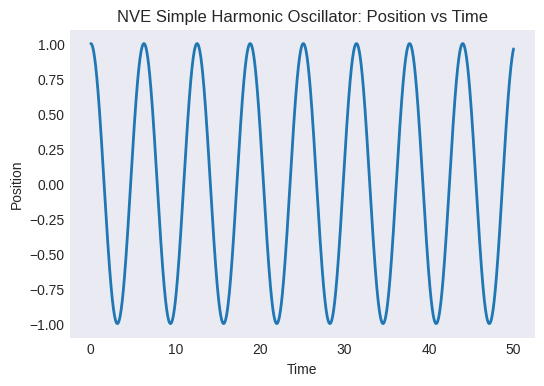

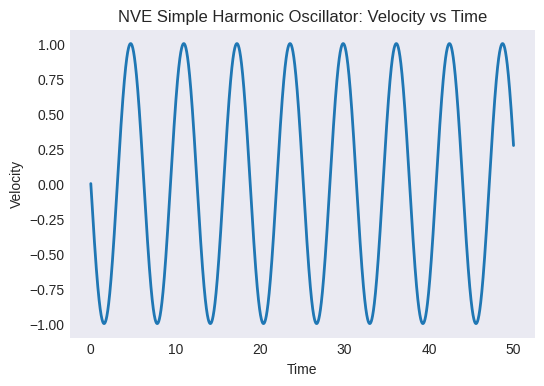

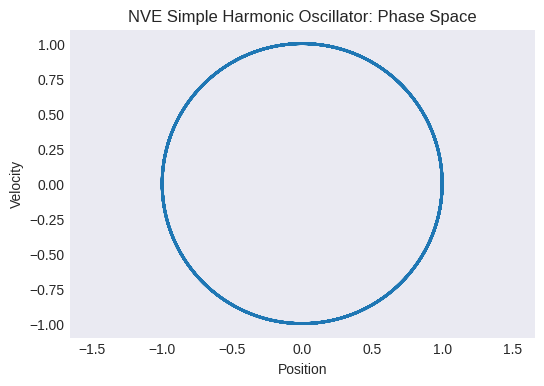

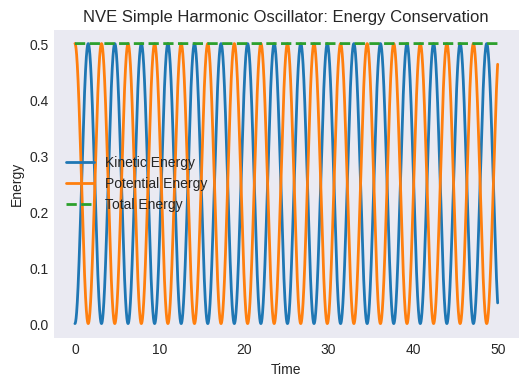

In [ ]:
# --- Plotting NVE Results ---

# 1. Position vs Time
plt.figure()
plt.plot(times, positions)
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("NVE Simple Harmonic Oscillator: Position vs Time")
plt.grid(False)
plt.show()

# 2. Velocity vs Time
plt.figure()
plt.plot(times, velocities)
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("NVE Simple Harmonic Oscillator: Velocity vs Time")
plt.grid(False)
plt.show()

# 3. Phase Space (Velocity vs Position)
plt.figure()
plt.plot(positions, velocities)
plt.xlabel("Position")
plt.ylabel("Velocity")
plt.title("NVE Simple Harmonic Oscillator: Phase Space")
plt.axis('equal') # Make aspect ratio equal
plt.grid(False)
plt.show()

# 4. Energies vs Time
plt.figure()
plt.plot(times, kinetic_energies, label="Kinetic Energy")
plt.plot(times, potential_energies, label="Potential Energy")
plt.plot(times, total_energies, label="Total Energy", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("NVE Simple Harmonic Oscillator: Energy Conservation")
plt.legend()
plt.grid(False)
# Optional: Zoom in on total energy to see fluctuations
# energy_fluctuation = total_energies - total_energies[0]
# plt.figure()
# plt.plot(times, energy_fluctuation)
# plt.title("Total Energy Fluctuation")
# plt.xlabel("Time"); plt.ylabel("Delta E")
plt.show()

## Lesson 2: Adding Temperature Control (NVT) with Langevin Dynamics

In the NVE simulation, total energy is conserved but temperature fluctuates. To sample the canonical ensemble, we add friction and random forces to Newton's law:

$$
m\ddot{x} = F_{\rm phys}(x) - \gamma m\dot{x} + R(t), \qquad
\langle R(t)R(t')\rangle = 2m\gamma k_B T_0\,\delta(t-t').
$$

**Integration Scheme (modified Velocity Verlet):**

1. **Half-step velocity (physical force)**

$$
v \leftarrow v + \frac{F_{\rm phys}(x)}{m}\frac{\Delta t}{2}
$$

2. **Half-step position**

$$
x \leftarrow x + v\frac{\Delta t}{2}
$$

3. **Full-step velocity (friction + random)**

$$
c_1 = e^{-\gamma\Delta t}, \qquad
c_2 = \sqrt{\frac{k_B T_0}{m}(1-c_1^2)}
$$

$$
v \leftarrow c_1v + c_2\,\mathcal{N}(0,1)
$$

where $\mathcal{N}(0,1)$ is a standard normal random variable.

4. **Second half-step position**

$$
x \leftarrow x + v\frac{\Delta t}{2}
$$

5. **Second half-step velocity (physical force)**

$$
v \leftarrow v + \frac{F_{\rm phys}(x)}{m}\frac{\Delta t}{2}
$$

**Instantaneous Temperature (1D):**

$$
T = \frac{mv^2}{k_B}
$$

(Here we take $k_B=1$ in reduced units.)


### Implementing Temperature Calculation and Langevin Integrator

Let's define the temperature calculation function and the BAOAB integration step.

In [ ]:
# Assume Boltzmann constant k_B = 1 for simplicity in reduced units
k_B = 1.0

def calculate_temperature_1d(velocity, mass):
  """Calculates instantaneous temperature for a 1D particle (kB=1)."""
  if mass <= 0:
      return 0.0 # Avoid division by zero if mass is invalid
  kinetic_energy = 0.5 * mass * velocity**2
  # For 1D, N_df = 1. KE = 0.5 * N_df * kB * T => T = 2 * KE / (N_df * kB)
  temperature = 2.0 * kinetic_energy / (1.0 * k_B)
  return temperature

def Velocity_verlet_langevin(x_curr, v_curr, mass, dt, gamma, target_temp, force_func, **force_args):
    """

    Args:
        x_curr (float): Current position.
        v_curr (float): Current velocity.
        mass (float): Mass of the particle.
        dt (float): Time step.
        gamma (float): Friction coefficient.
        target_temp (float): Target temperature (kB=1).
        force_func (callable): Function to calculate the physical force.
        **force_args: Additional keyword arguments for the force function.

    Returns:
        tuple: (x_new, v_new) - Updated position and velocity.
    """

    # Update velocity by half step with current force
    f_curr = force_func(x_curr, **force_args)
    v_half_b = v_curr + (f_curr / mass) * (dt / 2.0)

    # Update position by half step
    x_half_a = x_curr + v_half_b * (dt / 2.0)

    # Apply friction and random kick
    c1 = np.exp(-gamma * dt)
    # Ensure target_temp is non-negative before sqrt
    c2 = np.sqrt(k_B * max(0, target_temp) * (1.0 - c1**2) / mass)
    # Generate random number from standard normal distribution
    random_kick = np.random.normal(0, 1)
    v_half_o = c1 * v_half_b + c2 * random_kick

    # Update position by second half step
    x_new = x_half_a + v_half_o * (dt / 2.0)

    # Update velocity by half step with force at *new* position
    f_new = force_func(x_new, **force_args)
    v_new = v_half_o + (f_new / mass) * (dt / 2.0)

    return x_new, v_new

### Coding Exercise: Running the NVT Simulation Loop (Langevin)

Modify the simulation loop to use the Langevin BAOAB integrator.
1.  Choose a target temperature (`target_temp`) and friction coefficient (`gamma`). A larger gamma means stronger coupling to the heat bath.
2.  Inside the loop, call `langevin_baoab_step` instead of `velocity_verlet_step`.
3.  Store the instantaneous temperature at each step.

In [ ]:
# NVT Langevin Simulation Parameters
target_temp_lgv = 5.0  # Target temperature (in energy units, kB=1)
gamma = 3.0          # Friction coefficient (adjust to see effect)

# Arrays to store NVT results
times_nvt = np.zeros(n_steps)
positions_nvt = np.zeros(n_steps)
velocities_nvt = np.zeros(n_steps)
kinetic_energies_nvt = np.zeros(n_steps)
potential_energies_nvt = np.zeros(n_steps)
total_energies_nvt = np.zeros(n_steps) # Note: Total E is NOT conserved in NVT
temperatures_nvt = np.zeros(n_steps) # Store temperature

# Set initial values
x0_nvt = 1.0
v0_nvt = 0.0 # Can start at rest, Langevin will add energy
positions_nvt[0] = x0_nvt
velocities_nvt[0] = v0_nvt

# Calculate initial energies and temperature
kinetic_energies_nvt[0] = 0.5 * mass * velocities_nvt[0]**2
potential_energies_nvt[0] = potential_sh(positions_nvt[0], k=k_sh)
total_energies_nvt[0] = kinetic_energies_nvt[0] + potential_energies_nvt[0]
temperatures_nvt[0] = calculate_temperature_1d(velocities_nvt[0], mass)


# --- NVT Langevin Simulation Loop ---
print(f"Starting NVT (Langevin) simulation with Target T = {target_temp_lgv}, gamma = {gamma}")

for i in range(n_steps - 1):
    # Perform one Langevin BAOAB step
    x_new, v_new = Velocity_verlet_langevin(
        positions_nvt[i], velocities_nvt[i], mass, dt, gamma, target_temp_lgv,
        force_sh, k=k_sh
    )

    # Store new values
    positions_nvt[i+1] = x_new
    velocities_nvt[i+1] = v_new
    times_nvt[i+1] = times_nvt[i] + dt

    # Calculate and store energies and temperature using the new state
    kinetic_energies_nvt[i+1] = 0.5 * mass * v_new**2
    potential_energies_nvt[i+1] = potential_sh(x_new, k=k_sh) # Potential depends on position
    total_energies_nvt[i+1] = kinetic_energies_nvt[i+1] + potential_energies_nvt[i+1]
    temperatures_nvt[i+1] = calculate_temperature_1d(v_new, mass)

print("NVT (Langevin) Simulation finished.")

Starting NVT (Langevin) simulation with Target T = 5.0, gamma = 3.0
NVT (Langevin) Simulation finished.


### Analysis Exercise: NVT (Langevin) Simulation Results

1.  Plot the instantaneous temperature vs. time. Does it fluctuate around the target temperature? How does the friction coefficient `gamma` affect the fluctuations and the speed of reaching the target temperature? (Try changing `gamma` and re-running).
2.  Plot the total energy vs. time. Is it conserved? It shouldn't be, as the thermostat exchanges energy with the system.
3.  Plot the NVT phase space trajectory (velocity vs. position). How does it compare to the NVE phase space plot? Does it look more "diffusive" or "noisy"?

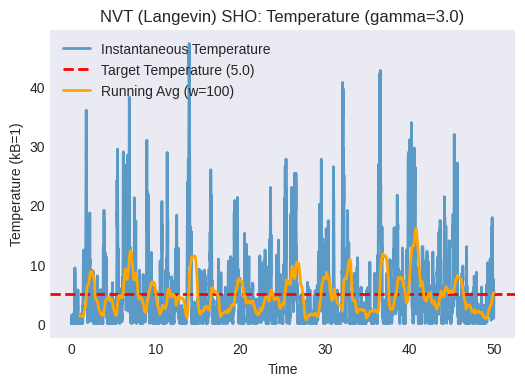

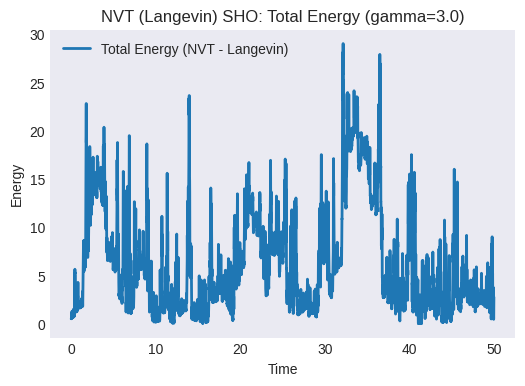

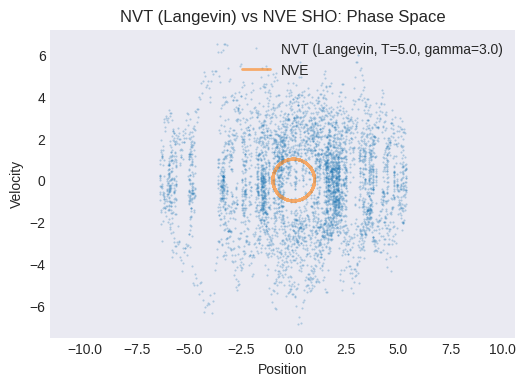

In [ ]:
# --- Plotting NVT (Langevin) Results ---

# 1. Temperature vs Time
plt.figure()
plt.plot(times_nvt, temperatures_nvt, label="Instantaneous Temperature", alpha=0.7)
plt.axhline(target_temp_lgv, color='r', linestyle='--', label=f"Target Temperature ({target_temp_lgv})")
plt.xlabel("Time")
plt.ylabel("Temperature (kB=1)")
plt.title(f"NVT (Langevin) SHO: Temperature (gamma={gamma})")
plt.legend()
plt.grid(False)
# Optional: Add running average
window_size = 100
if n_steps > window_size:
    temp_avg = np.convolve(temperatures_nvt, np.ones(window_size)/window_size, mode='valid')
    plt.plot(times_nvt[window_size-1:], temp_avg, label=f'Running Avg (w={window_size})', color='orange')
    plt.legend()
plt.show()

# 2. Total Energy vs Time
plt.figure()
plt.plot(times_nvt, total_energies_nvt, label="Total Energy (NVT - Langevin)")
# plt.plot(times, total_energies, label="Total Energy (NVE)", linestyle=':') # Comparison
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title(f"NVT (Langevin) SHO: Total Energy (gamma={gamma})")
plt.legend()
plt.grid(False)
plt.show()

# 3. Phase Space (Velocity vs Position) - NVT Langevin
plt.figure()
plt.plot(positions_nvt, velocities_nvt, '.', markersize=1, alpha=0.3, label=f'NVT (Langevin, T={target_temp_lgv}, gamma={gamma})')
# Compare with NVE
plt.plot(positions, velocities, label='NVE', linestyle='-', alpha=0.6)
plt.xlabel("Position")
plt.ylabel("Velocity")
plt.title("NVT (Langevin) vs NVE SHO: Phase Space")
plt.axis('equal')
plt.legend()
plt.grid(False)
plt.show()

## Lesson 3: Particle in a Double-Well Potential (NVE)

Now let's consider a more interesting potential: the **double-well potential**. This potential has two stable minima separated by an energy barrier. It is a simple model for systems that can exist in two different states (for example, conformational changes or reaction-like transitions).

**Potential Energy**

A common form is:

$$
V(x) = ax^4 - bx^2
$$

where $a>0$ and $b>0$.

- The $x^4$ term dominates at large $|x|$, confining the particle.
- The $-x^2$ term creates two off-center minima.

The stationary points satisfy:

$$
\frac{dV}{dx} = 4ax^3 - 2bx = 0
$$

So we get $x=0$ (barrier top) and $x=\pm\sqrt{\frac{b}{2a}}$ (minima).

The barrier height relative to the minima is:

$$
E_{\rm barrier} = V(0) - V\!\left(\pm\sqrt{\frac{b}{2a}}\right) = \frac{b^2}{4a}
$$

**Force**

$$
F(x) = -\frac{dV}{dx} = -\left(4ax^3 - 2bx\right) = -4ax^3 + 2bx
$$

We will simulate this system in the **NVE ensemble** and ask whether the particle can cross the barrier within the simulation time.


### Defining the Double-Well Potential and Force

Double-well minima at: +/- 1.41 (Value: -4.00)
Barrier top at x=0 (Value: 0.00)
Barrier height (relative to minima): 4.00


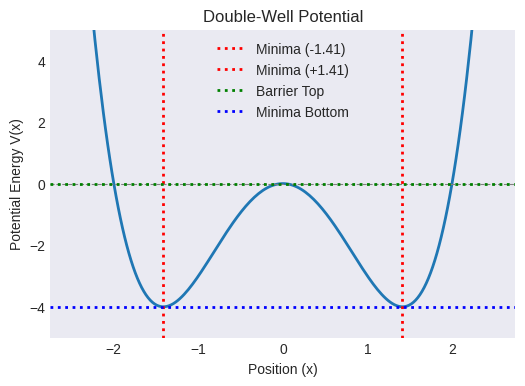

In [ ]:
def potential_dw(x, a, b):
  """Calculates the potential energy of a double-well potential."""
  return a * x**4 - b * x**2

def force_dw(x, a, b):
  """Calculates the force from a double-well potential."""
  return -4 * a * x**3 + 2 * b * x

# Parameters for the double-well potential
a_dw = 1.0
b_dw = 4.0

# Calculate minima and barrier height for reference
minima_pos = np.sqrt(b_dw / (2 * a_dw))
minima_val = potential_dw(minima_pos, a=a_dw, b=b_dw)
barrier_top_val = potential_dw(0, a=a_dw, b=b_dw)
barrier_height = barrier_top_val - minima_val # Relative height

print(f"Double-well minima at: +/- {minima_pos:.2f} (Value: {minima_val:.2f})")
print(f"Barrier top at x=0 (Value: {barrier_top_val:.2f})")
print(f"Barrier height (relative to minima): {barrier_height:.2f}")


# Plot the potential to visualize
x_plot = np.linspace(-2.5, 2.5, 200)
v_plot = potential_dw(x_plot, a=a_dw, b=b_dw)
plt.figure()
plt.plot(x_plot, v_plot)
plt.xlabel("Position (x)")
plt.ylabel("Potential Energy V(x)")
plt.title("Double-Well Potential")
plt.ylim(minima_val - 1, barrier_height + 1) # Adjust ylim for better view
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.axvline(-minima_pos, color='r', linestyle=':', label=f'Minima (-{minima_pos:.2f})')
plt.axvline(minima_pos, color='r', linestyle=':', label=f'Minima (+{minima_pos:.2f})')
plt.axhline(barrier_top_val, color='g', linestyle=':', label='Barrier Top')
plt.axhline(minima_val, color='b', linestyle=':', label='Minima Bottom')
plt.legend()
plt.grid(False)
plt.show()

### Coding Exercise: Running the NVE Simulation for the Double-Well

Adapt the NVE simulation loop from Lesson 1 in this module to use the double-well potential and force functions (`potential_dw`, `force_dw`).
* Choose initial conditions (`x0_dw`, `v0_dw`) such that the particle starts near one of the minima (e.g., $x \approx -\sqrt{b/(2a)}$).
* Ensure the initial total energy is defined. How does the initial total energy compare to the barrier height? Do you expect the particle to cross the barrier?
* Run the simulation and store the trajectory and energies.

In [ ]:
# --- NVE Double-Well Simulation ---

# Initial conditions for Double Well (start near left minimum)
x0_dw = -minima_pos + 0.1 # Start slightly offset from the minimum
v0_dw = 0.5               # Give it some initial velocity/energy

# Calculate initial energy - HOW DOES THIS COMPARE TO THE BARRIER HEIGHT?
initial_pe_dw = potential_dw(x0_dw, a=a_dw, b=b_dw)
initial_ke_dw = 0.5 * mass * v0_dw**2
initial_total_energy_dw = initial_pe_dw + initial_ke_dw
print(f"Initial position: {x0_dw:.2f}")
print(f"Initial velocity: {v0_dw:.2f}")
print(f"Initial Total Energy: {initial_total_energy_dw:.2f}")
print(f"Barrier Height (relative to minima): {barrier_height:.2f}")
print(f"Energy relative to barrier top: {initial_total_energy_dw - barrier_top_val:.2f}")


# Arrays to store results
n_steps_dw = 10000 # May need more steps to see transitions if energy is low
times_dw = np.zeros(n_steps_dw)
positions_dw = np.zeros(n_steps_dw)
velocities_dw = np.zeros(n_steps_dw)
kinetic_energies_dw = np.zeros(n_steps_dw)
potential_energies_dw = np.zeros(n_steps_dw)
total_energies_dw = np.zeros(n_steps_dw)

# Set initial values
positions_dw[0] = x0_dw
velocities_dw[0] = v0_dw
kinetic_energies_dw[0] = initial_ke_dw
potential_energies_dw[0] = initial_pe_dw
total_energies_dw[0] = initial_total_energy_dw

# Run the simulation loop (NVE using Velocity Verlet)
for i in range(n_steps_dw - 1):
    # Perform one Verlet step using the double-well force
    x_new, v_new = velocity_verlet_step(
        positions_dw[i], velocities_dw[i], mass, dt, force_dw, a=a_dw, b=b_dw
    )

    # Store new values
    positions_dw[i+1] = x_new
    velocities_dw[i+1] = v_new
    times_dw[i+1] = times_dw[i] + dt

    # Calculate and store energies
    kinetic_energies_dw[i+1] = 0.5 * mass * v_new**2
    potential_energies_dw[i+1] = potential_dw(x_new, a=a_dw, b=b_dw)
    total_energies_dw[i+1] = kinetic_energies_dw[i+1] + potential_energies_dw[i+1]

print("NVE Double-Well Simulation finished.")

Initial position: -1.31
Initial velocity: 0.50
Initial Total Energy: -3.80
Barrier Height (relative to minima): 4.00
Energy relative to barrier top: -3.80
NVE Double-Well Simulation finished.


### Analysis Exercise: Double-Well NVE Results

1.  Plot position vs. time. Does the particle stay in the initial well, or does it cross the barrier to the other well? How often?
2.  Plot the phase space trajectory (velocity vs. position). What does it look like? Can you identify regions corresponding to the two wells?
3.  Plot the energies vs. time. Is total energy conserved?
4.  **Discussion:** How does the particle's behavior depend on its initial total energy relative to the barrier height? What would happen if the initial energy was much lower than the barrier? What if it was significantly higher? (Feel free to change `v0_dw` and re-run the simulation). This illustrates the **sampling problem**: if energy barriers are high relative to the system's energy/temperature, transitions between states (wells) become **rare events** that are difficult to observe in a standard MD simulation of limited length.

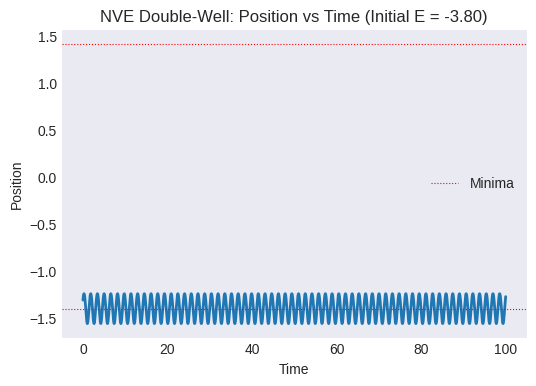

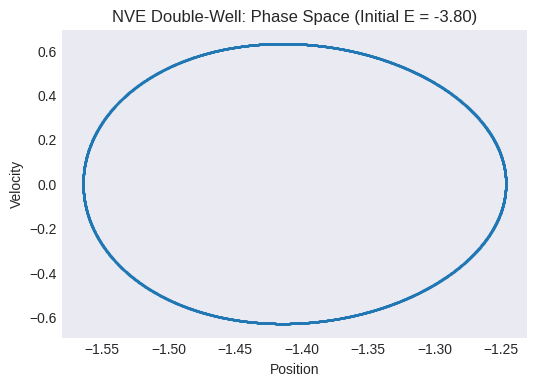

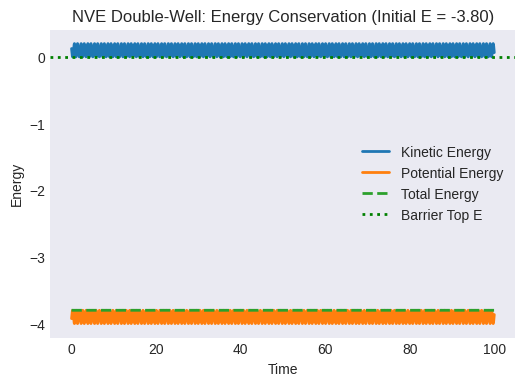

In [ ]:
# --- Plotting Double-Well NVE Results ---

# 1. Position vs Time
plt.figure()
plt.plot(times_dw, positions_dw)
plt.xlabel("Time")
plt.ylabel("Position")
plt.title(f"NVE Double-Well: Position vs Time (Initial E = {initial_total_energy_dw:.2f})")
plt.axhline(-minima_pos, color='r', linestyle=':', linewidth=0.8, label='Minima')
plt.axhline(minima_pos, color='r', linestyle=':', linewidth=0.8)
plt.legend()
plt.grid(False)
plt.show()

# 2. Phase Space (Velocity vs Position)
plt.figure()
plt.plot(positions_dw, velocities_dw, '.', markersize=1, alpha=0.5) # Use dots for dense trajectory
plt.xlabel("Position")
plt.ylabel("Velocity")
plt.title(f"NVE Double-Well: Phase Space (Initial E = {initial_total_energy_dw:.2f})")
plt.grid(False)
plt.show()

# 3. Energies vs Time
plt.figure()
plt.plot(times_dw, kinetic_energies_dw, label="Kinetic Energy")
plt.plot(times_dw, potential_energies_dw, label="Potential Energy")
plt.plot(times_dw, total_energies_dw, label="Total Energy", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title(f"NVE Double-Well: Energy Conservation (Initial E = {initial_total_energy_dw:.2f})")
plt.legend()
plt.grid(False)
# Optional: Plot energy relative to barrier top
plt.axhline(barrier_top_val, color='g', linestyle=':', label='Barrier Top E')
plt.legend()
plt.show()

---
End of Module 4. We have successfully implemented our first MD simulations in Python!

* We simulated a particle in a Simple Harmonic potential using the Velocity Verlet algorithm in the NVE ensemble and observed energy conservation.
* We added a **Langevin thermostat** using the velocity verlet integrator to control temperature and simulate the SHO in the NVT ensemble, observing temperature fluctuations around the target and non-conservation of total energy.
* We simulated a particle in a Double-Well potential (NVE) and encountered the **sampling problem** associated with energy barriers and rare events.

This last point directly motivates the need for the **enhanced sampling techniques** we will explore starting in Module 5, which are designed to overcome such barriers and efficiently explore complex energy landscapes, often in conjunction with a thermostat like Langevin dynamics.